**Importing necessary libraries**


In [1]:
import numpy as np
import pandas as pd
import sklearn
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import os 

checking for missing values

In [35]:
df = pd.read_csv(r'C:\Users\hp\Downloads/creditcard.csv')
print("missing values:", df.isnull().values.any())# missing values

missing values: False


Let's start our visulization

In [3]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 284807 rows and 31 columns


# 1- Exploratory data analysis :


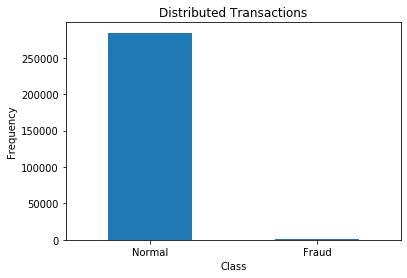

In [4]:
# let's plot normal and fraud classes
count_classes = pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Distributed Transactions")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

**Heatmap**


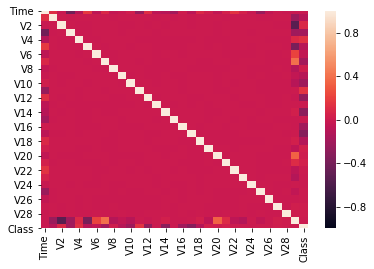

In [5]:
#heatmap
sns.heatmap(df.corr(), vmin=-1)
plt.show()

**distplot : a kernel density estimate and histogram**

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


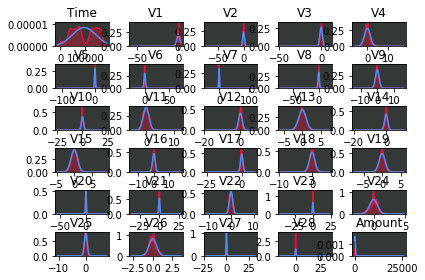

In [6]:
fig, axs = plt.subplots(6, 5, squeeze=False)
for i, ax in enumerate(axs.flatten()):
    ax.set_facecolor('xkcd:charcoal')
    ax.set_title(df.columns[i])
    sns.distplot(df.iloc[:, i], ax=ax, fit=norm,
                 color="#DC143C", fit_kws={"color": "#4e8ef5"})
    ax.set_xlabel('')
fig.tight_layout(h_pad=-1.5, w_pad=-1.5)
plt.show()

In [26]:
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
y=df.pop('Class')
df.pop('Time')
x=df.values
y=np.array(y)
counter=(np.count_nonzero(y))
print("Amount of data that is not fraudulent " + str(len(y)-counter))
print("Amount that indeed is fraudulent " + str(counter))
print("Percentage of non fraud " +str(100*(1-(counter/len(y)))))
print("Percentage of fraud "+str(100*((counter/len(y)))))

Amount of data that is not fraudulent 284315
Amount that indeed is fraudulent 492
Percentage of non fraud 99.82725143693798
Percentage of fraud 0.1727485630620034


In [36]:
#describing the data
print(df.shape) 
print(df.describe()) 

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271

## correlation matrix

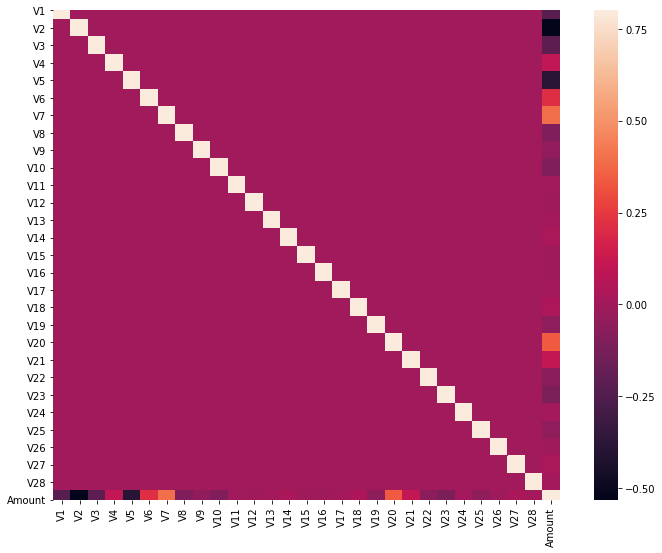

In [10]:
#plotting the correlation matrix
corrmat = df.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show()

Checking frequency distribution with distplot

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


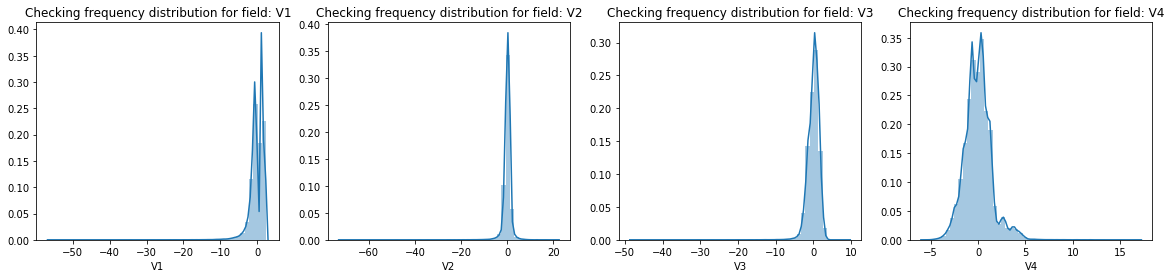

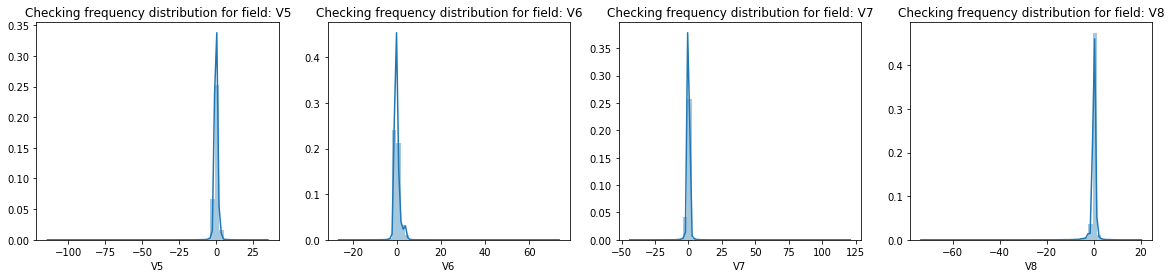

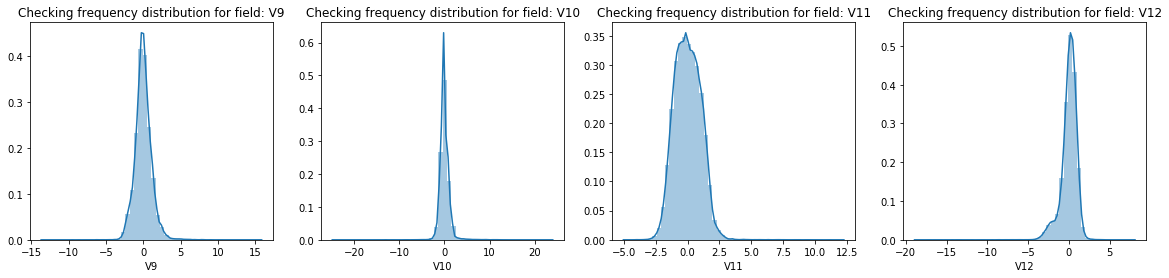

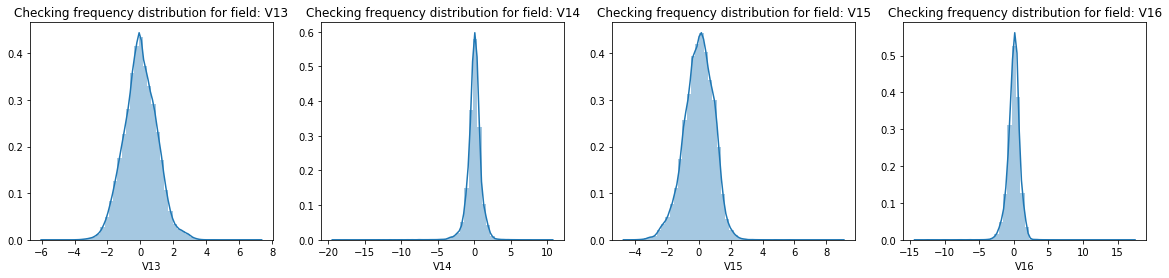

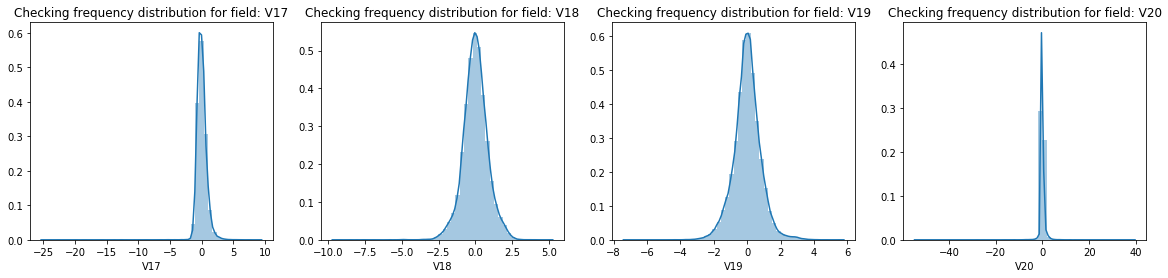

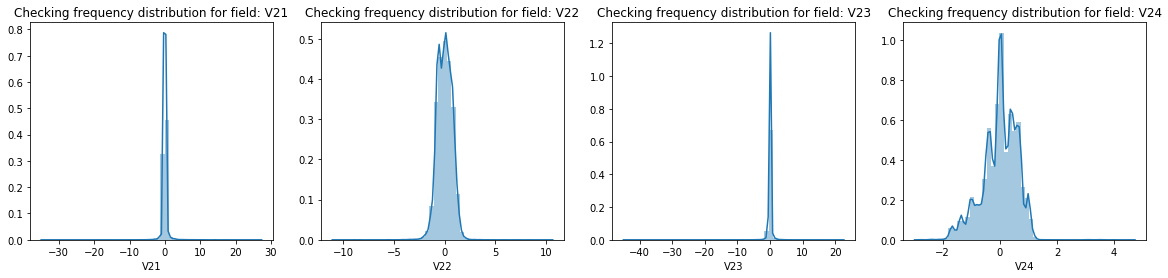

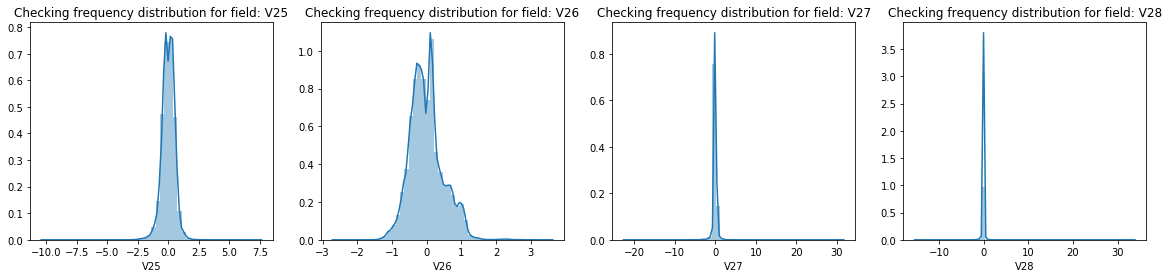

In [11]:
# FREQUENCY PLOTS
for i in range(7):
    f, axs = plt.subplots(ncols=4, figsize=(20,4))
    for j in range(4):
        v_num = 4*i + j + 1
        ftr_name = 'V' + str(v_num)
        sns.distplot(df[ftr_name], ax=axs[j])
        axs[j].set_title('Checking frequency distribution for field: ' + ftr_name)

In [ ]:
df = pd.read_csv(r'C:\Users\hp\Downloads/creditcard.csv')


BOX PLOTS for the 28 columns

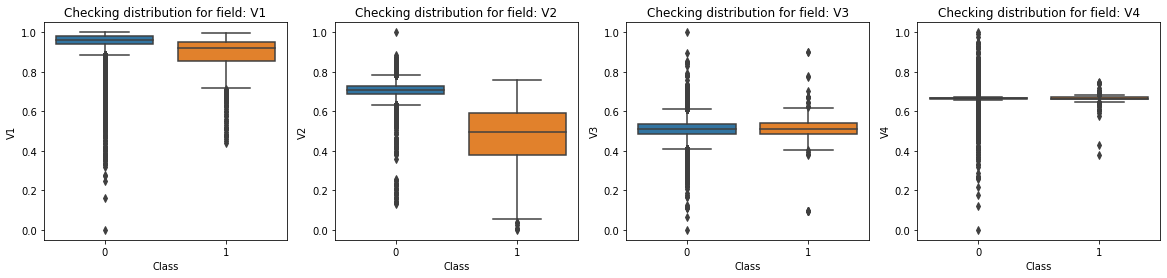

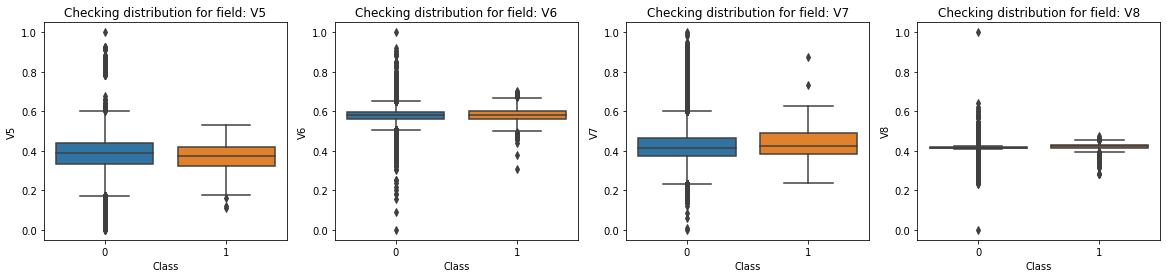

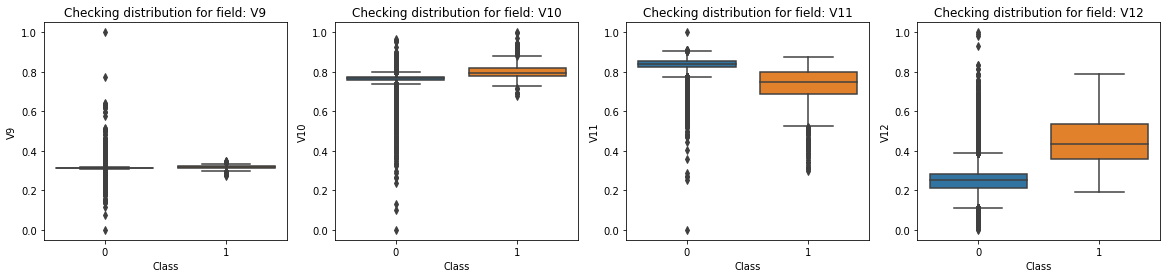

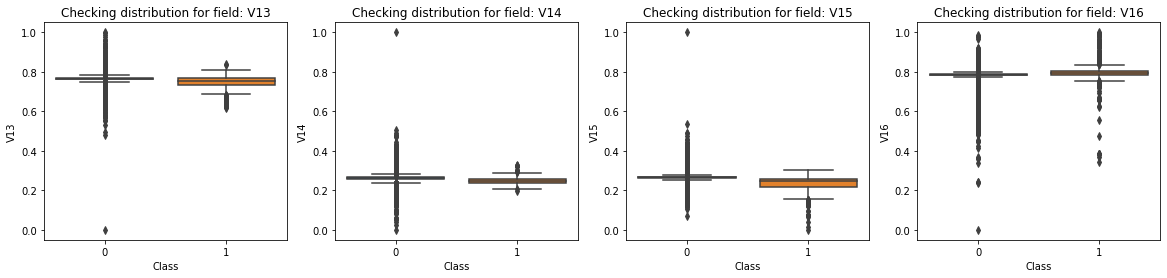

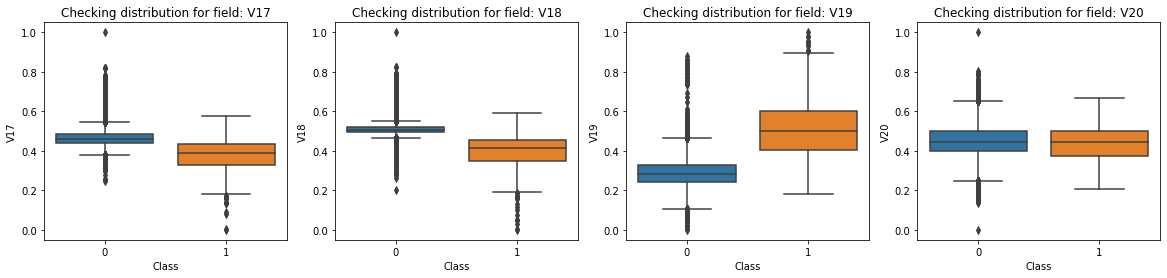

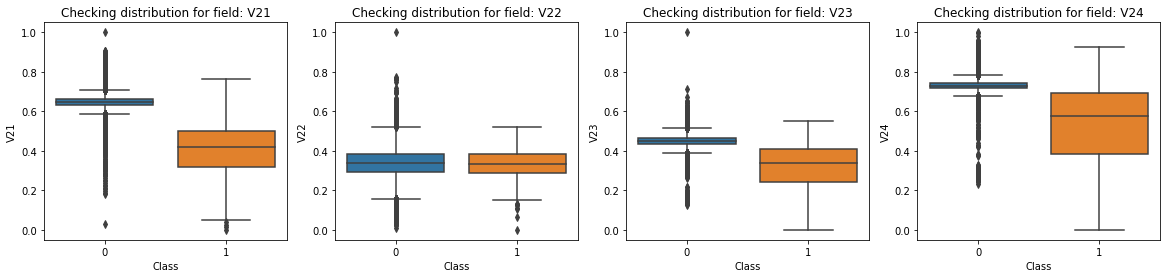

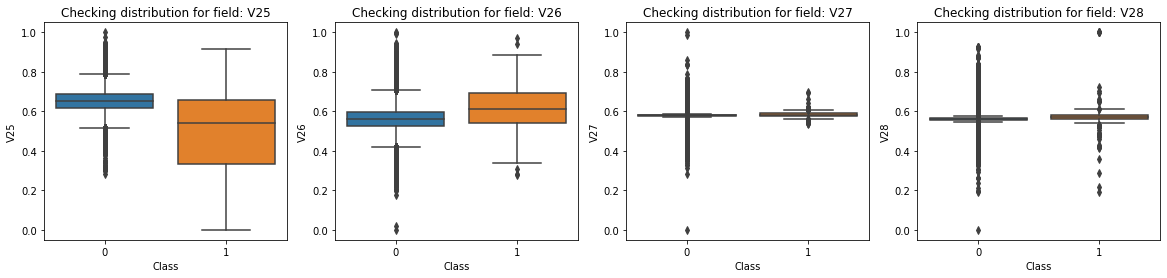

In [21]:
# BOX PLOTS
for i in range(7):
    f, axs = plt.subplots(ncols=4, figsize=(20,4))
    for j in range(4):
        v_num = 4*i + j + 1
        ftr_name = 'V' + str(v_num)
        sns.boxplot(x=df['Class'], y=ftr_name, data=df, ax=axs[j])
        axs[j].set_title('Checking distribution for field: ' + ftr_name)


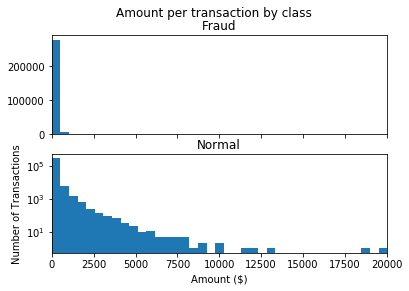

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(df.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(df.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


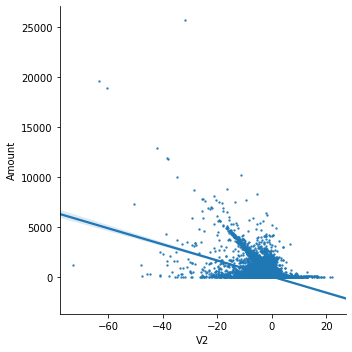

In [17]:
s = sns.lmplot(x='V2', y='Amount',data=df, fit_reg=True,scatter_kws={'s':2})
plt.show()

# 2 - Data preparation :

In [123]:
df = pd.read_csv(r'C:\Users\hp\Downloads/creditcard.csv')


In [124]:
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [125]:
#separating the X and the Y values
Y = df["Class"] 
X = df.drop(['Class'], axis = 1) 


In [126]:

print(X.shape) 
print(Y.shape)


(284807, 30)
(284807,)


In [127]:
x= X.values 
y= Y.values

In [128]:
print(X)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [129]:
print(y)

[0 0 0 ... 0 0 0]


# 3 - Fraud detection :

In [130]:
#training and testing data 
from sklearn.model_selection import train_test_split 
#split the data into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

**3-1 building the Random Forest Classifier:**

In [131]:
#building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(x_train, y_train) 
#predictions 
predictions = rfc.predict(x_test) 


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [132]:
#building all kinds of evaluating parameters
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
fraud = df[df['Class'] == 1]

n_outliers = len(fraud) 
n_errors = (predictions != y_test).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score( y_test, predictions) 
print("The accuracy is: {}".format(acc)) 
  
prec = precision_score(y_test, predictions) 
print("The precision is: {}".format(prec)) 
  
rec = recall_score(y_test, predictions) 
print("The recall is: {}".format(rec)) 
  
f1 = f1_score(y_test, predictions) 
print("The F1-Score is: {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, predictions) 
print("The Matthews correlation coefficient is: {} ".format(MCC)) 


The model used is Random Forest classifier
The accuracy is: 0.9994733330992591
The precision is: 0.9080459770114943
The recall is: 0.7821782178217822
The F1-Score is: 0.8404255319148937
The Matthews correlation coefficient is: 0.8425102521489515 


In [133]:
seed = 42

In [134]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=seed)

In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

 **3-2 building the Logistic Regression Classifier**

In [136]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C= 0.001, penalty= 'none' , solver= 'lbfgs' , random_state = 0)
classifier.fit(x_train, y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
from sklearn.metrics import  accuracy_score 
predictions = classifier.predict(x_test)
accuracy_score(y_test,predictions)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.73      0.63      0.68       101

    accuracy                           1.00     56962
   macro avg       0.86      0.82      0.84     56962
weighted avg       1.00      1.00      1.00     56962



 **3-3 Building the Linear Discriminant Analysis Classifier:**

In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
model=[]
models.append(('LDA', LinearDiscriminantAnalysis()))


In [118]:
#For LDA
# Make predictions on validation dataset
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)
predictions_lda = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions_lda))
print(confusion_matrix(Y_validation, predictions_lda))
print(classification_report(Y_validation, predictions_lda))


0.9993679997191109
[[56853    11]
 [   25    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.74      0.80        98

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



 **3-4 Comparing Results :**

In [139]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('RF', RandomForestClassifier()))


In [144]:
# Evaluate each algo
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\skl

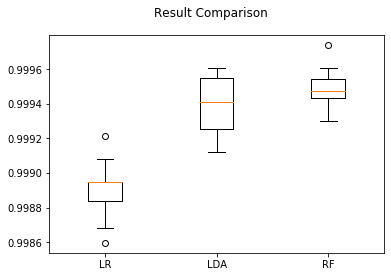

In [145]:
# Compare Results 
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Result comparing')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();